# Highest Testing Accuracy, Knn Value for each Combo

This file will tell you what the highest testing percent is for all combinations of the columns of a given df, the combinations that are better than the test accuracies found with all columns, and the combinations that are worse than 60% with the associated knn values.

This file will also tell you the percent of the time a certain column name is excluded from the training data used in the best, better than using all of the columns, and worse than 60% in the df. 

*IMPORTANT*

The Excluded column values are the columns that are *NOT* used in the training data. So if the possible columns are 'x', 'y', and 'z' and 'y' is excluded 100% of the time in best testing accuracy section, then the combinations of columns that produce the highest testing accuracy do *NOT* include the 'y' column. Therefore, the combination of columns that make the highest accuracy is 'x' and 'z'.

Now let's look at another example, except this is for the worse section of testing accuracies, where the testing accuracy is below 60%. If the possible columns of the df are '1', '2', and '3' and column '3' is excluded 100% of the time, that indicates that column '3' is likely very important in raising the testing accuracy, since without using that column the testing accuracy is less than 60%.

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from itertools import combinations
import pickle
import collections, itertools

#create definition to find frequency of excluded elements and knn values
def counts(data):
    #create definitions for best, better_than_all, and worse dataframes
    best = data[data.Test_Acc == data.Test_Acc.max()]
    better_than_all = data[data.Test_Acc >= data.Test_Acc[0]]
    worse = data[data.Test_Acc <= .6]
    #create list of defined dataframes
    frames = [best, better_than_all, worse]
    #create list of labels
    label = ['Best', 'Better_than_all', 'Worse']
    #create list of the percents that the excluded elements are associated with, worse dfs are for percents less than 60
    percent = [data.Test_Acc.max()*100,100*data.Test_Acc[0],100*.6]
    per_label = ['Max Percent:','All Column Percent:','Below:']
    #loop through length of frames
    for i in range(len(frames)):
        #print what df is being used
        print(label[i] + ' excluded column frequency:')
        #create df
        ex = frames[i].Excluded
        #print length of df and associated percent
        print('Number of combinations:')
        print(len(ex))
        print(per_label[i])
        print(percent[i])
        freq = collections.defaultdict(int)  # 0 by default
        for x in itertools.chain.from_iterable(ex):
            freq[x] += 1/(len(ex))
        print(freq)
        print(label[i] + ' knn values')
        kn = frames[i].Knn_val
        freq = collections.defaultdict(int)  # 0 by default
        for x in itertools.chain.from_iterable(kn):
            freq[x] += 1/len(kn)
        print(freq)

#read df files
distance = pd.read_csv('total_distances.csv')
vel_freq = pd.read_csv('Velocity_Frequencies.csv')
xyz_stats = pd.read_csv('xyz_stats.csv')

## distance - Values for all columns and Combos

All columns:

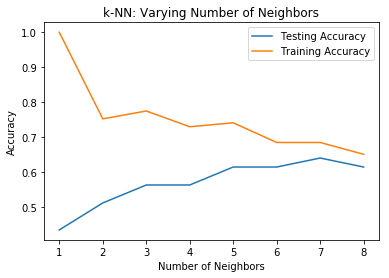

0.6410256410256411
none
[7]


In [2]:
#set target variable y and features X
X = distance.drop(['older'], axis=1).values
y = distance['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#find max testing accuracy, and knn value of that
max_test_acc0 = np.max(test_accuracy)
excluded0 = 'none'
knn_ideal0 = np.where(test_accuracy == test_accuracy.max())[0] + 1

#print values
print(max_test_acc0)
print(excluded0)
print(knn_ideal0)

All: Combos

Make a list of column names of the df. Before running through the loop that makes combinations of the column names, the 'older' column has to be dropped. This is the target column and it will always be dropped in the training data. Make sure that you are NOT dropping the 'older' column from the df. You are just dropping it from the list of column names that will be used to make the combinations.

In [3]:
#make list of column names to be made into a combination, dropping 'older'
lst = distance.columns.drop('older')

#make empty list
combination = []

for i in range(len(lst)):
#make a combination of just one of the values in the list
    for combo in combinations(lst, i): 
        combination.append(combo)

In [4]:
#reset lists
max_test_acc = []
excluded = []
knn_ideal = []

#make variable for 'older' column
old = ['older']

#loop through the combinations
for op in combination:
    #drop combination and 'older' for training data
    drop_col = old + list(op)
    X = distance.drop(drop_col, axis=1).values
    #set target
    y = distance['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#Code borrowed from DataCamp
#----------------------------------------------------------
# Optimizing machine learning model by finding the optimal number of neighbors
#----------------------------------------------------------
# Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
    for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
        knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
    #plt.title('k-NN: Varying Number of Neighbors')
    #plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    #plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    #plt.legend()
    #plt.xlabel('Number of Neighbors')
    #plt.ylabel('Accuracy')
    #plt.show()

#find knn value at the max testing accuracy
    index = np.where(test_accuracy == test_accuracy.max())[0]
    knn_val = index + 1
    
#print excluded columns, max testing accuracy, and knn value at the max testing accuracy
    #print('Excluded columns:')
    #print(old + list(op))
    #print('Max Testing Accuracy:')
    #print(test_accuracy.max())
    #print('KNN value of Max Testing Accuracy:')
    #print(knn_val)
    
#add the excluded columns, max test accuracy, and the knn value at the max testing accuracy
    knn_ideal.append(knn_val)
    max_test_acc.append(test_accuracy.max())
    excluded.append(list(op))

In [5]:
#make empty df
acc = pd.DataFrame()
#add columns for excluded variable, max testing accuracy, and the knn value at that value
acc['Excluded'] =  excluded
acc['Test_Acc'] = max_test_acc
acc['Knn_val'] = knn_ideal
#acc.to_csv('attempt3.csv')
acc.tail()

,Excluded,Test_Acc,Knn_val
10,"[z_tot_d, tot_d]",0.615385,[1]
11,"[x_tot_d, y_tot_d, z_tot_d]",0.589744,[3]
12,"[x_tot_d, y_tot_d, tot_d]",0.564103,"[1, 3]"
13,"[x_tot_d, z_tot_d, tot_d]",0.564103,[8]
14,"[y_tot_d, z_tot_d, tot_d]",0.564103,[6]


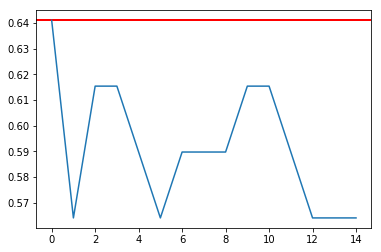

In [6]:
#add horizontal line for accuracy with all columns
plt.axhline(acc.Test_Acc[0], linewidth=2, color='r')
plt.plot(acc.Test_Acc)
plt.show()

In [7]:
counts(acc)

Best excluded column frequency:
Number of combinations:
1
Max Percent:
64.1025641025641
defaultdict(<class 'int'>, {})
Best knn values
defaultdict(<class 'int'>, {7: 1.0})
Better_than_all excluded column frequency:
Number of combinations:
1
All Column Percent:
64.1025641025641
defaultdict(<class 'int'>, {})
Better_than_all knn values
defaultdict(<class 'int'>, {7: 1.0})
Worse excluded column frequency:
Number of combinations:
10
Below:
60.0
defaultdict(<class 'int'>, {'x_tot_d': 0.7, 'tot_d': 0.5, 'y_tot_d': 0.5, 'z_tot_d': 0.5})
Worse knn values
defaultdict(<class 'int'>, {8: 0.4, 6: 0.30000000000000004, 2: 0.2, 4: 0.1, 7: 0.1, 3: 0.30000000000000004, 1: 0.1})


The highest testing accuracy resulted from when all columns were used in the data, so no column will be removed when this df is combined with another df.

## vel_freq - Values for all columns and Combos

All columns:

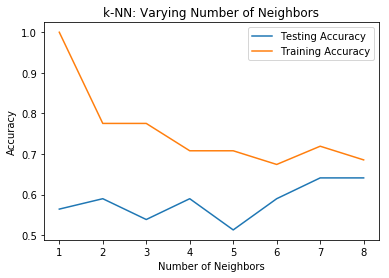

0.6410256410256411
none
[7 8]


In [8]:
#set target variable y and features X
X = vel_freq.drop(['older'], axis=1).values
y = vel_freq['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#find max testing accuracy, and knn value of that
max_test_acc0 = np.max(test_accuracy)
excluded0 = 'none'
knn_ideal0 = np.where(test_accuracy == test_accuracy.max())[0] + 1

#print values
print(max_test_acc0)
print(excluded0)
print(knn_ideal0)

All Combos:

Change the df to xyz_stats.

In [9]:
#make list of column names to be made into a combination, dropping 'older'
lst = vel_freq.columns.drop('older')

#make empty list
combination = []

for i in range(len(lst)):
#make a combination of just one of the values in the list
    for combo in combinations(lst, i): 
        combination.append(combo)

In [10]:
#reset lists
max_test_acc = []
excluded = []
knn_ideal = []

#make variable for 'older' column
old = ['older']

#loop through the combinations
for op in combination:
    #drop combination and 'older' for training data
    drop_col = old + list(op)
    X = vel_freq.drop(drop_col, axis=1).values
    #set target
    y = vel_freq['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#Code borrowed from DataCamp
#----------------------------------------------------------
# Optimizing machine learning model by finding the optimal number of neighbors
#----------------------------------------------------------
# Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
    for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
        knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
    #plt.title('k-NN: Varying Number of Neighbors')
    #plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    #plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    #plt.legend()
    #plt.xlabel('Number of Neighbors')
    #plt.ylabel('Accuracy')
    #plt.show()

#find knn value at the max testing accuracy
    index = np.where(test_accuracy == test_accuracy.max())[0]
    knn_val = index + 1
    
#print excluded columns, max testing accuracy, and knn value at the max testing accuracy
    #print('Excluded columns:')
    #print(old + list(op))
    #print('Max Testing Accuracy:')
    #print(test_accuracy.max())
    #print('KNN value of Max Testing Accuracy:')
    #print(knn_val)
    
#add the excluded columns, max test accuracy, and the knn value at the max testing accuracy
    knn_ideal.append(knn_val)
    max_test_acc.append(test_accuracy.max())
    excluded.append(list(op))

In [11]:
#make empty df
acc = pd.DataFrame()
#add columns for excluded variable, max testing accuracy, and the knn value at that value
acc['Excluded'] =  excluded
acc['Test_Acc'] = max_test_acc
acc['Knn_val'] = knn_ideal
#acc.to_csv('attempt3.csv')
acc.head()

,Excluded,Test_Acc,Knn_val
0,[],0.641026,"[7, 8]"
1,[xpsd avg],0.641026,"[7, 8]"
2,[xfreq avg],0.564103,[2]
3,[ypsd avg],0.641026,"[7, 8]"
4,[yfreq avg],0.615385,"[2, 7]"


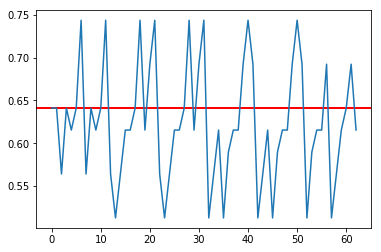

In [12]:
#add horizontal line for accuracy with all columns
plt.axhline(acc.Test_Acc[0], linewidth=2, color='r')
plt.plot(acc.Test_Acc)
plt.show()

In [13]:
counts(acc)

Best excluded column frequency:
Number of combinations:
8
Max Percent:
74.35897435897436
defaultdict(<class 'int'>, {'zfreq avg': 1.0, 'xpsd avg': 0.5, 'ypsd avg': 0.5, 'zpsd avg': 0.5})
Best knn values
defaultdict(<class 'int'>, {5: 1.0})
Better_than_all excluded column frequency:
Number of combinations:
25
All Column Percent:
64.1025641025641
defaultdict(<class 'int'>, {'xpsd avg': 0.5199999999999999, 'ypsd avg': 0.4799999999999999, 'zpsd avg': 0.5199999999999999, 'zfreq avg': 0.68, 'yfreq avg': 0.36, 'xfreq avg': 0.04})
Better_than_all knn values
defaultdict(<class 'int'>, {7: 0.64, 8: 0.32, 5: 0.64, 6: 0.32, 4: 0.04})
Worse excluded column frequency:
Number of combinations:
20
Below:
60.0
defaultdict(<class 'int'>, {'xfreq avg': 1.0000000000000002, 'xpsd avg': 0.49999999999999994, 'ypsd avg': 0.49999999999999994, 'yfreq avg': 0.6, 'zpsd avg': 0.39999999999999997, 'zfreq avg': 0.2})
Worse knn values
defaultdict(<class 'int'>, {2: 0.44999999999999996, 7: 0.39999999999999997, 8: 0.05,

The max testing percent was 74.36%

To get the max testing percent the 'zfreq avg' column was excluded 100%. This means that the 'zfreq avg' column made the knn model worse and will be excluded in the next round.

The 'xfreq avg' and 'yfreq avg' columns were never excluded from the max testing percent training features, so these columns must be important to predicting whether the subject is young or old. This is affirmed with 'xfreq avg' not being used in the worse testing accuracies 100% of the time and the 'yfreq avg' not being used 60% of the time.

## xyz_stats - Values for all columns and Combos

All Columns:

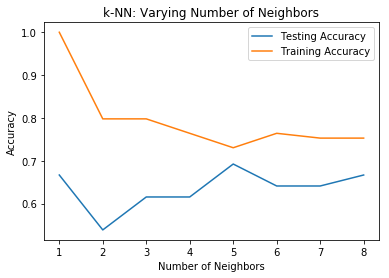

0.6923076923076923
none
[5]


In [14]:
#set target variable y and features X
X = xyz_stats.drop(['older'], axis=1).values
y = xyz_stats['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#find max testing accuracy, and knn value of that
max_test_acc0 = np.max(test_accuracy)
excluded0 = 'none'
knn_ideal0 = np.where(test_accuracy == test_accuracy.max())[0] + 1

#print values
print(max_test_acc0)
print(excluded0)
print(knn_ideal0)

All Combos:

Use "Get Test_Acc, Knn_val, and Combo with .pkl" versions 1,2,3, and 4 to achieve the following:

Since the number of combinations of the columns of the xyz_stats df is over 2 million, I suggest to break up the list of combinations into multiple segments and then run through them on different computers. Then you will have to save the "Excluded" and "Knn_val" columns using a pickle format, because if you save them as a csv, the any element that is a list is converted into an object. By saving the columns which have elements that are lists as a .pkl you will preserve their list type and will be able to use the counts() function on them.

You will also have to save the "Test_Acc" column as a csv, so that you can combine it with the "Excluded" and "Knn_val" columns that were saved as a .pkl.

These parts can be imported into this document for further analysis.

In [15]:
#make empty lists 
excluded = []
knn = []
dfs = []

#loop through range to open .pkl files, note this depends on how files are named
for i in range(1,5):
    #open .pkl file
    with open('xyz_stats_excluded' + str(i) + '.pkl', 'rb') as f:
        excluded_columns = pickle.load(f)
        #add file to empty list
        excluded.append(excluded_columns)
    #open .pkl file
    with open('xyz_stats_knn_val' + str(i) + '.pkl', 'rb') as f:
        knn_values = pickle.load(f)
        #add file to empty list
        knn.append(knn_values)
    df = pd.read_csv('xyz_stats' + str(i) + '.csv')
    dfs.append(df)

#combine elements in list
excluded_con = pd.concat(excluded, axis=0)
knn_con = pd.concat(knn, axis=0)
df_csv = pd.concat(dfs, axis=0, sort=True)

#select for columns
df_csv = df_csv[['Excluded','Knn_val','Test_Acc']]
#add index
df_csv.index = range(len(df_csv.Excluded))

#make empty dataframe
acc = pd.DataFrame()
#add columns
acc['Excluded'] = excluded_con
acc['Test_Acc'] = df_csv.Test_Acc
acc['Knn_val'] = knn_con

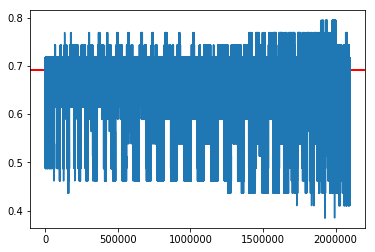

In [16]:
#add horizontal line for accuracy with all columns
plt.axhline(acc.Test_Acc[0], linewidth=2, color='r')
plt.plot(acc.Test_Acc)
plt.show()

In [17]:
counts(acc)

Best excluded column frequency:
Number of combinations:
81
Max Percent:
79.48717948717949
defaultdict(<class 'int'>, {'xmean': 0.3333333333333333, 'xstd': 1.0000000000000022, 'xmin': 0.3333333333333333, 'x25%': 1.0000000000000022, 'x50%': 0.6666666666666674, 'x75%': 0.3333333333333333, 'xmax': 1.0000000000000022, 'ystd': 1.0000000000000022, 'y25%': 1.0000000000000022, 'y50%': 0.6666666666666674, 'ymax': 1.0000000000000022, 'zstd': 1.0000000000000022, 'z25%': 1.0000000000000022, 'zmax': 1.0000000000000022, 'z50%': 0.6666666666666674, 'y75%': 0.3333333333333333, 'z75%': 0.3333333333333333, 'ymin': 0.3333333333333333, 'zmin': 0.3333333333333333, 'ymean': 0.3333333333333333, 'zmean': 0.3333333333333333})
Best knn values
defaultdict(<class 'int'>, {5: 1.0000000000000022})
Better_than_all excluded column frequency:
Number of combinations:
941871
All Column Percent:
69.23076923076923
defaultdict(<class 'int'>, {'xmean': 0.5014986128724882, 'xstd': 0.5206774600823675, 'x25%': 0.531604646501990

The max testing percent was 79.49%

To get the max testing percent the 'xstd', 'x25%', 'xmax', 'ystd', 'y25%', 'ymax', 'zstd', 'z25%', and 'zmax' columns were excluded 100%. The 'x50%', 'y50%', and 'z50%' were excluded 66.6% of the time. This means that these columns made the knn model worse and will be excluded in the next round.

The columns associated with mean, min, and 75% were excluded from the max testing percent training features the least at 33%, so these columns must be important to predicting whether the subject is young or old. This is affirmed with the min columns not being used in the worse testing accuracies 96% of the time. The mean and 75% columns may not be as important since they were only excluded around 50% of the time when the testing accuracy was below 60%.

## adjust dfs

In [18]:
#adjust dfs, distance doesn't need adjusting
vel_freq_ad = vel_freq.drop(['zfreq avg'], axis=1)
xyz_stats_ad = xyz_stats.drop(['xstd', 'x25%', 'xmax', 'ystd', 'y25%', 'ymax', 'zstd', 'z25%','zmax', 'x50%', 'y50%', 'z50%'], axis=1)

print(vel_freq_ad.columns)
print(xyz_stats_ad.columns)
print(distance.columns)

Index(['xpsd avg', 'xfreq avg', 'ypsd avg', 'yfreq avg', 'zpsd avg', 'older'], dtype='object')
Index(['xmean', 'xmin', 'x75%', 'ymean', 'ymin', 'y75%', 'zmean', 'zmin',
       'z75%', 'older'],
      dtype='object')
Index(['x_tot_d', 'y_tot_d', 'z_tot_d', 'tot_d', 'older'], dtype='object')


Before combining dfs, drop one of the 'older' columns.

In [19]:
#drop one of the older
vel_freq_ad = vel_freq_ad.drop(['older'], axis=1)

In [20]:
#combine
vel_dist = pd.concat([vel_freq_ad, distance], axis=1)

All Columns:

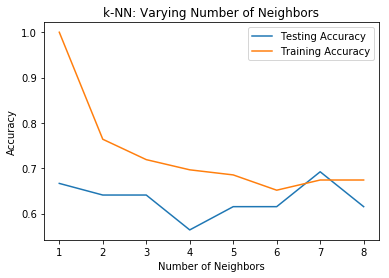

0.6923076923076923
none
[7]


In [21]:
#set target variable y and features X
X = vel_dist.drop(['older'], axis=1).values
y = vel_dist['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#find max testing accuracy, and knn value of that
max_test_acc0 = np.max(test_accuracy)
excluded0 = 'none'
knn_ideal0 = np.where(test_accuracy == test_accuracy.max())[0] + 1

#print values
print(max_test_acc0)
print(excluded0)
print(knn_ideal0)

All Combos:

In [22]:
#make list of column names to be made into a combination, dropping 'older'
lst = vel_dist.columns.drop('older')

#make empty list
combination = []

for i in range(len(lst)):
#make a combination of just one of the values in the list
    for combo in combinations(lst, i): 
        combination.append(combo)

In [23]:
#reset lists
max_test_acc = []
excluded = []
knn_ideal = []

#make variable for 'older' column
old = ['older']

#loop through the combinations
for op in combination:
    #drop combination and 'older' for training data
    drop_col = old + list(op)
    X = vel_dist.drop(drop_col, axis=1).values
    #set target
    y = vel_dist['older'].values

#----------------------------------------------------------
#Create a KNN model with knn = 3 neighbors that separates all the data into 30% test data and 70% training data
#----------------------------------------------------------
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

#Code borrowed from DataCamp
#----------------------------------------------------------
# Optimizing machine learning model by finding the optimal number of neighbors
#----------------------------------------------------------
# Setup arrays to store train and test accuracies
    neighbors = np.arange(1, 9)
    train_accuracy = np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
    for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
        knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
        knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
        test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
    #plt.title('k-NN: Varying Number of Neighbors')
    #plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
    #plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
    #plt.legend()
    #plt.xlabel('Number of Neighbors')
    #plt.ylabel('Accuracy')
    #plt.show()

#find knn value at the max testing accuracy
    index = np.where(test_accuracy == test_accuracy.max())[0]
    knn_val = index + 1
    
#print excluded columns, max testing accuracy, and knn value at the max testing accuracy
    #print('Excluded columns:')
    #print(old + list(op))
    #print('Max Testing Accuracy:')
    #print(test_accuracy.max())
    #print('KNN value of Max Testing Accuracy:')
    #print(knn_val)
    
#add the excluded columns, max test accuracy, and the knn value at the max testing accuracy
    knn_ideal.append(knn_val)
    max_test_acc.append(test_accuracy.max())
    excluded.append(list(op))

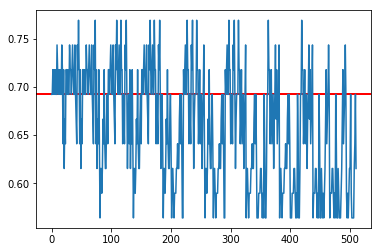

Best excluded column frequency:
Number of combinations:
16
Max Percent:
76.92307692307693
defaultdict(<class 'int'>, {'z_tot_d': 0.5, 'tot_d': 1.0, 'xpsd avg': 0.5, 'ypsd avg': 0.5, 'yfreq avg': 0.5, 'x_tot_d': 0.5, 'zpsd avg': 0.5})
Best knn values
defaultdict(<class 'int'>, {8: 0.5, 3: 0.5})
Better_than_all excluded column frequency:
Number of combinations:
224
All Column Percent:
69.23076923076923
defaultdict(<class 'int'>, {'xpsd avg': 0.4999999999999994, 'xfreq avg': 0.14285714285714285, 'ypsd avg': 0.4999999999999994, 'yfreq avg': 0.4285714285714282, 'zpsd avg': 0.4999999999999994, 'x_tot_d': 0.3928571428571426, 'y_tot_d': 0.535714285714285, 'z_tot_d': 0.3928571428571426, 'tot_d': 0.4285714285714282})
Better_than_all knn values
defaultdict(<class 'int'>, {7: 0.2500000000000003, 3: 0.28571428571428586, 5: 0.28571428571428586, 4: 0.17857142857142866, 1: 0.10714285714285711, 8: 0.14285714285714285, 6: 0.10714285714285711, 2: 0.035714285714285705})
Worse excluded column frequency:
Nu

In [24]:
#make empty df
acc = pd.DataFrame()
#add columns for excluded variable, max testing accuracy, and the knn value at that value
acc['Excluded'] =  excluded
acc['Test_Acc'] = max_test_acc
acc['Knn_val'] = knn_ideal
#acc.to_csv('attempt3.csv')

#add horizontal line for accuracy with all columns
plt.axhline(acc.Test_Acc[0], linewidth=2, color='r')
plt.plot(acc.Test_Acc)
plt.show()
counts(acc)
print(vel_dist.columns)

The max testing accuracy increased from in the 60s for both of them before to 76.92%.

'tot_d' was excluded from all of the best testing accuracy combinations, so it will not be in the next round.

'xfreq avg' and 'yfreq avg' remain important with 'x_tot_d' also being important.

## Continue Using other Feature Dfs